In [56]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

os.chdir(r"C:\Users\Sahana Dhandapani\OneDrive\Documents")
data=pd.read_excel("coded responses.xlsx")

In [57]:
print(data.isnull().sum())

Unnamed: 0                   93
Unnamed: 1                   93
Department                    0
Team                          0
Position                      0
Working condition             0
T.Working condition           0
C.Leadership                  0
E.Leadership                  0
career development            0
co-workers                    0
Training                      0
Learning                      0
problem solving               0
Learning&dev                  0
  conflicts                   0
d.individual contribution     0
d.target completion           0
d.quality of work             0
d.engagement&motivation       0
dtype: int64


In [58]:
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 1'], errors='ignore')



In [59]:
print(data.isnull().sum())

Department                   0
Team                         0
Position                     0
Working condition            0
T.Working condition          0
C.Leadership                 0
E.Leadership                 0
career development           0
co-workers                   0
Training                     0
Learning                     0
problem solving              0
Learning&dev                 0
  conflicts                  0
d.individual contribution    0
d.target completion          0
d.quality of work            0
d.engagement&motivation      0
dtype: int64


In [60]:
data.columns = data.columns.str.strip()

In [12]:
print(data.columns.tolist())

['Department', 'Team', 'Position', 'Working condition', 'T.Working condition', 'C.Leadership', 'E.Leadership', 'career development', 'co-workers', 'Training', 'Learning', 'problem solving', 'Learning&dev', 'conflicts', 'd.individual contribution', 'd.target completion', 'd.quality of work', 'd.engagement&motivation']


In [75]:


# Define Independent Variables (IVs) - Employee Utilization of Resources
X = data[["Working condition", "E.Leadership", "career development", "co-workers", "Training", "Learning"]]

# Define Dependent Variables (DVs) - Employee Performance
y1 = data["d.target completion"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)



Random Forest Regression for Target Completion:
Mean Squared Error (MSE): 0.1706
R-squared Score (R²): 0.1204



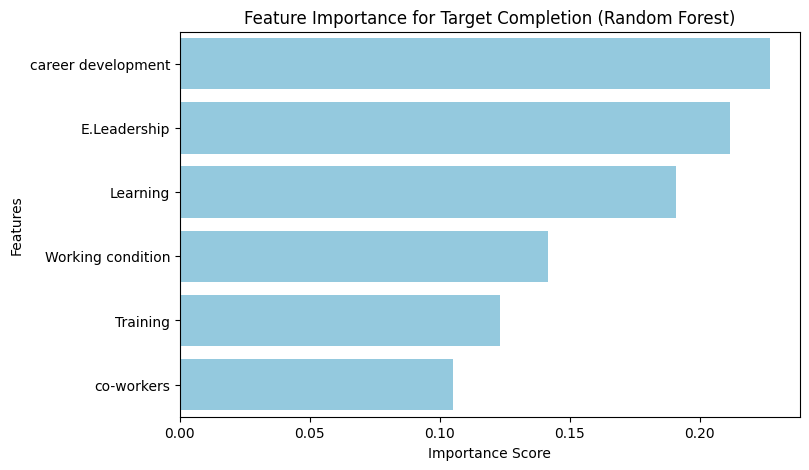

In [76]:
import seaborn as sns

def train_random_forest(X_train, X_test, y_train, y_test, target_name):
    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    
    # Evaluate Model Performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Random Forest Regression for {target_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared Score (R²): {r2:.4f}\n")
    
    # Feature Importance
    feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], color="skyblue")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {target_name} (Random Forest)")
    plt.show()

    return rf

# Train Random Forest for Each Dependent Variable
rf_target_completion = train_random_forest(X_train, X_test, y1_train, y1_test, "Target Completion")